# Feature Matching

In [1]:
import numpy as np
import cv2
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

In [20]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

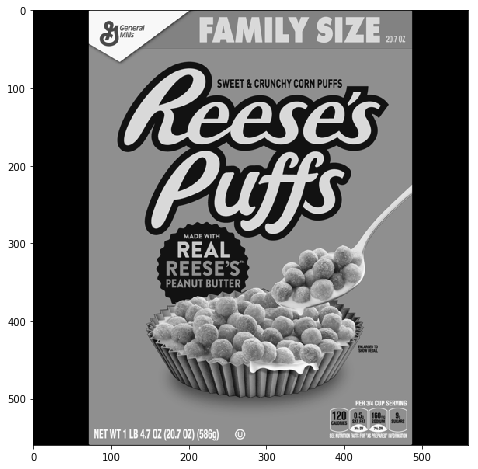

In [21]:
reeses = cv2.imread("Computer-Vision-with-Python/DATA/reeses_puffs.png",0)
display(reeses)

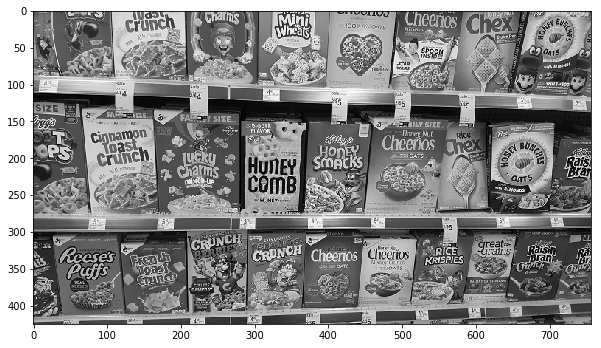

In [22]:
# target
cereals = cv2.imread("Computer-Vision-with-Python/DATA/many_cereals.jpg",0)
display(cereals)

## Create a detect objector

In [23]:
# create a detector object
orb = cv2.ORB_create()

In [24]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

## Create brute-force object (X useful)

In [25]:
# create a brute-force object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [26]:
matches = bf.match(des1, des2)

In [27]:
matches = sorted(matches, key = lambda x: x.distance) # sort

In [28]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:30], None, flags = 2)

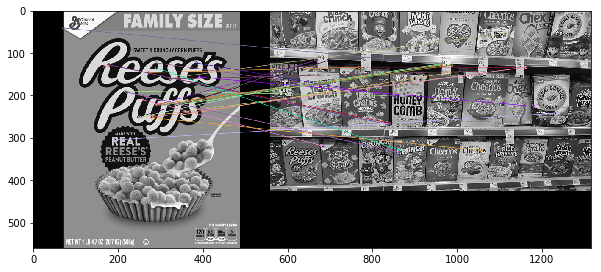

In [29]:
display(reeses_matches)

## Feature Matching with SIFT descriptor

In [34]:
# create a sift descriptor
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [35]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k = 2)

In [36]:
good = [] # keep holding good match (short distance)

# if match1 distance is less than 75% of match2 distance, good match
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

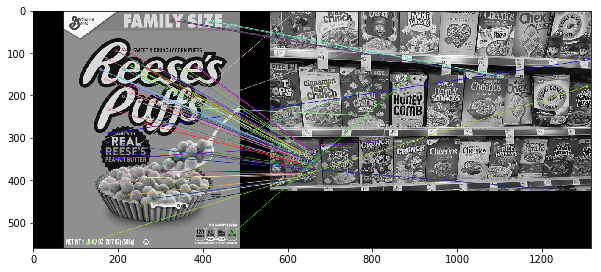

In [37]:
# Let's draw
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags = 2)
display(sift_matches)

## Feature Matching with FLANN-based matches

In [38]:
# FLANN-based matches
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [39]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [40]:
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

In [41]:
matchesMask = [[0,0] for i in range(len(matches))]

for i, (m1, m2) in enumerate(matches):
    if m1.distance < 0.8 * m2.distance:
        matchesMask[i] = [1,0]

In [42]:
draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = 0)
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

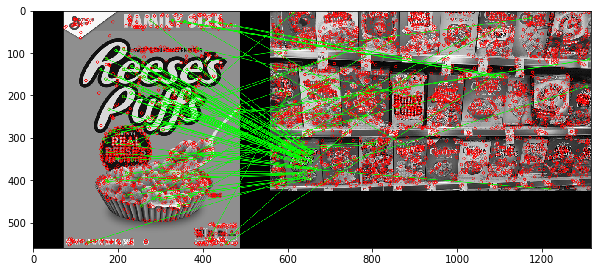

In [43]:
display(flann_matches)